In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = "../simulations/"

In [87]:
#r_list = ['0.0', '0.1', '1.0', '10.0', '100.0']
#r_list = np.logspace(-1,2,10)[:-1]
r_list = np.logspace(-1,3,13)
n_r = len(r_list)
n_samples = 100
x = np.arange(1, n_samples) / n_samples
x_fold = x[:n_samples//2]
pi_weight = 2*(x_fold)*(1 - x_fold)
print(pi_weight)

[ 0.0198  0.0392  0.0582  0.0768  0.095   0.1128  0.1302  0.1472  0.1638
  0.18    0.1958  0.2112  0.2262  0.2408  0.255   0.2688  0.2822  0.2952
  0.3078  0.32    0.3318  0.3432  0.3542  0.3648  0.375   0.3848  0.3942
  0.4032  0.4118  0.42    0.4278  0.4352  0.4422  0.4488  0.455   0.4608
  0.4662  0.4712  0.4758  0.48    0.4838  0.4872  0.4902  0.4928  0.495
  0.4968  0.4982  0.4992  0.4998  0.5   ]


In [88]:
sim = 'a-2.0'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
    with open(data_dir + fn) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] = np.array(line.split(), dtype=float)
                jMAF_triu[i,:] = np.array(datafile.readline().split())
                break
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 3

mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_kingman = jMAF_fold
mMAF_kingman = mMAF_fold
pi_kingman = np.dot(mMAF_fold, pi_weight)
# Note: currently waiting by joint maf
#PMI_kingman = jMAF_fold * np.log2(ratio_fold)
PMI_kingman = np.log2(ratio_fold)
diag_kingman = np.diagonal(PMI_kingman, axis1=1, axis2=2)
offdiag_kingman = (np.sum(PMI_kingman, axis=2) - diag_kingman) / (n_samples/2 - 1)

In [89]:
sim = 'a-1.5'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
    with open(data_dir + fn) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] = np.array(line.split(), dtype=float)
                jMAF_triu[i,:] = np.array(datafile.readline().split())
                break
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

x_fold = x[:n_samples//2]
mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 3

mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_mmc = jMAF_fold
mMAF_mmc = mMAF_fold
pi_mmc = np.dot(mMAF_fold, pi_weight)
#PMI_mmc = jMAF_fold * np.log2(ratio_fold)
PMI_mmc = np.log2(ratio_fold)
diag_mmc = np.diagonal(PMI_mmc, axis1=1, axis2=2)
offdiag_mmc = (np.sum(PMI_mmc, axis=2) - diag_mmc) / (n_samples/2 - 1)

/home/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


In [90]:
sim = 'a-1.01'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    filecount = 0.0
    for rep in range(10):
        fn = 'jsfs_{}_r-{}_rep-{}.txt'.format(sim, r, rep)
        try:
            datafile = open(data_dir + fn)
        except FileNotFoundError:
            continue
        filecount += 1
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] += np.array(line.split(), dtype=float)
                jMAF_triu[i,:] += np.array(datafile.readline().split(), dtype=float)
                break
        datafile.close()
    mMAF[i,:] /= filecount
    jMAF_triu[i,:] /= filecount
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

x_fold = x[:n_samples//2]
mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 3

mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_bsc = jMAF_fold
mMAF_bsc = mMAF_fold
pi_bsc = np.dot(mMAF_fold, pi_weight)
#PMI_bsc = jMAF_fold * np.log2(ratio_fold)
PMI_bsc = np.log2(ratio_fold)
diag_bsc = np.diagonal(PMI_bsc, axis1=1, axis2=2)
offdiag_bsc = (np.sum(PMI_bsc, axis=2) - diag_bsc) / (n_samples/2 - 1)

/home/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


In [91]:
sim = 'T-0.01_S-0.1'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
    with open(data_dir + fn) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] = np.array(line.split(), dtype=float)
                jMAF_triu[i,:] = np.array(datafile.readline().split())
                break
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

x_fold = x[:n_samples//2]
mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 3

mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_step = jMAF_fold
mMAF_step = mMAF_fold
pi_step = np.dot(mMAF_fold, pi_weight)
#PMI_step = jMAF_fold * np.log2(ratio_fold)
PMI_step = np.log2(ratio_fold)
diag_step = np.diagonal(PMI_step, axis1=1, axis2=2)
offdiag_step = (np.sum(PMI_step, axis=2) - diag_step) / (n_samples/2 - 1)

In [92]:
print(pi_kingman)
print(pi_mmc)
print(pi_bsc)
print(pi_step)

[ 1.9797683   1.97754926  1.98272966  1.98210526  1.98166954  1.98094112
  1.9815702   1.97896617  1.9827001   1.98249799  1.98372225  1.97812777
  1.97753019]
[ 1.97844118  1.98283893  1.97901912  1.98820122  1.9755378   1.97770564
  1.97817148  1.98183064  1.97612384  1.98991442  1.97864794  0.          0.        ]
[ 1.98616357  1.98284297  1.97370579  1.98112801  1.9819008   1.97395653
  1.97930009  1.98649998  1.98131896  1.97727329         nan         nan
         nan]
[ 0.21543942  0.21645102  0.21604638  0.21575282  0.21559892  0.21616343
  0.21560943  0.21570309  0.21584888  0.21597416  0.21559415  0.21557459
  0.21547297]


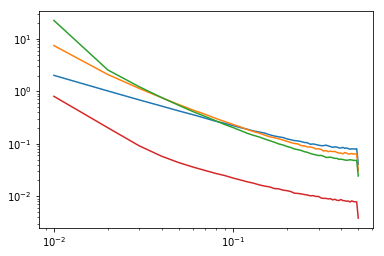

In [93]:
plt.loglog(x_fold, mMAF_kingman[0,:])
plt.loglog(x_fold, mMAF_mmc[0,:])
plt.loglog(x_fold, mMAF_bsc[0,:])
plt.loglog(x_fold, mMAF_step[0,:])
plt.show()

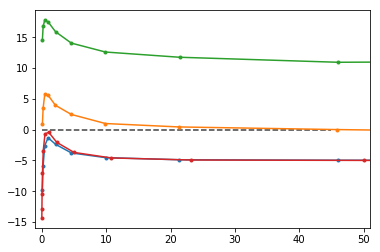

In [95]:
plt.plot(r_list*pi_kingman/2, np.sum(offdiag_kingman, axis=1), '.-')
plt.plot(r_list*pi_mmc/2, np.sum(offdiag_mmc, axis=1), '.-')
plt.plot(r_list*pi_bsc/2, np.sum(offdiag_bsc, axis=1), '.-')
plt.plot(r_list*pi_step/2, np.sum(offdiag_step, axis=1), '.-')

plt.hlines(0,0.1,45, linestyle='dashed', color='0.25')
plt.xlim([-1,51])
plt.show()

0.1


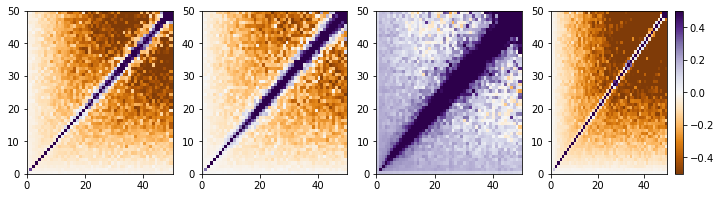

0.215443469003


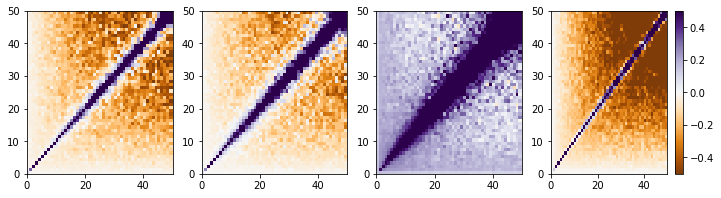

0.464158883361


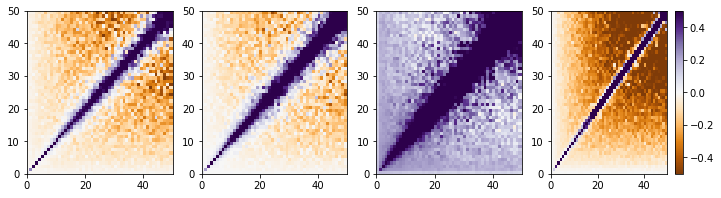

1.0


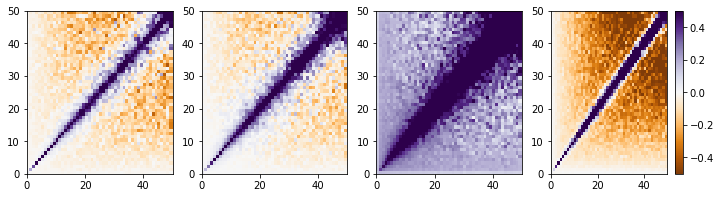

2.15443469003


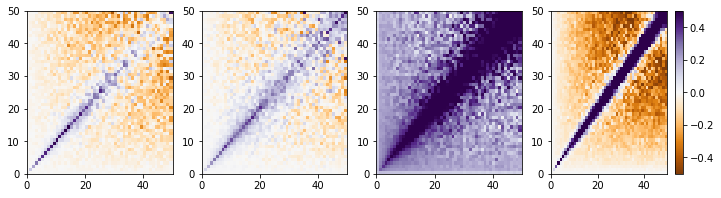

4.64158883361


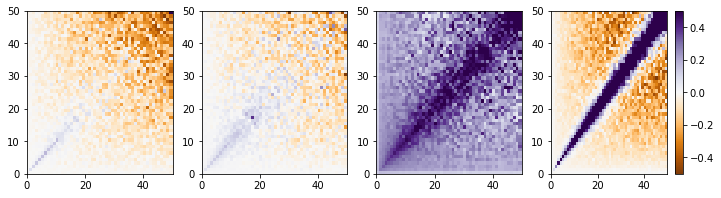

10.0


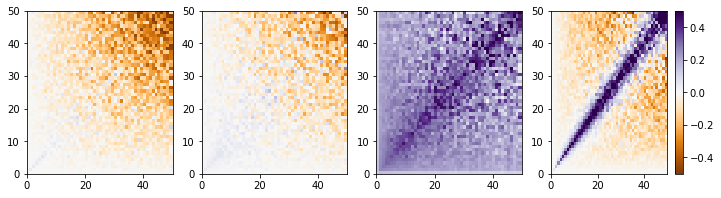

21.5443469003


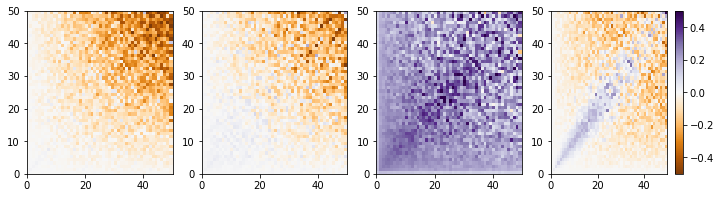

46.4158883361


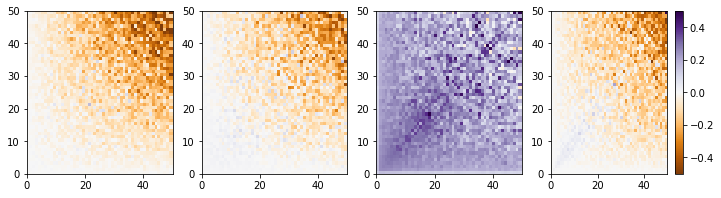

In [18]:
for i, r in enumerate(r_list):
    print(r)
    fig = plt.figure(figsize=(12,3))
    ax = plt.subplot(1,4,1)
    ax.pcolor(PMI_kingman[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    
    ax = plt.subplot(1,4,2)
    ax.pcolor(PMI_mmc[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    
    ax = plt.subplot(1,4,3)
    plt.pcolor(PMI_bsc[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    
    ax = plt.subplot(1,4,4)
    plt.pcolor(PMI_step[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')


    plt.colorbar()

    #plt.colorbar()
    plt.show()

0.1


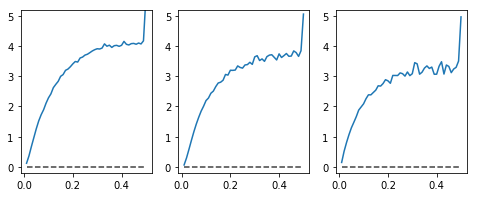

0.215443469003


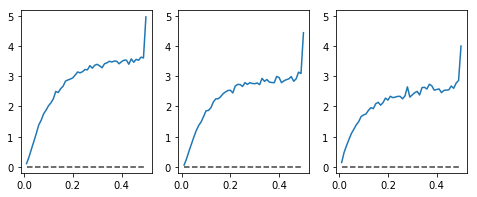

0.464158883361


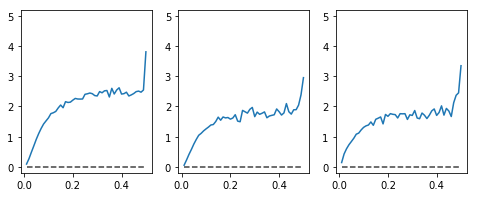

1.0


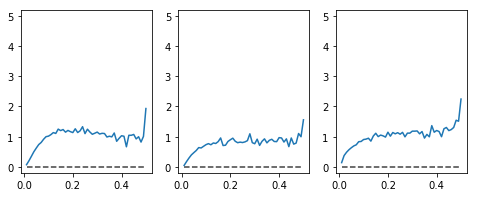

2.15443469003


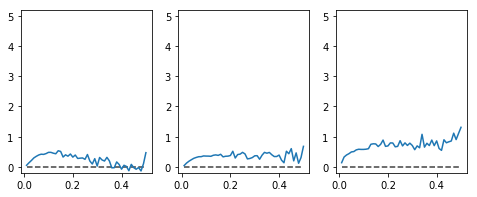

4.64158883361


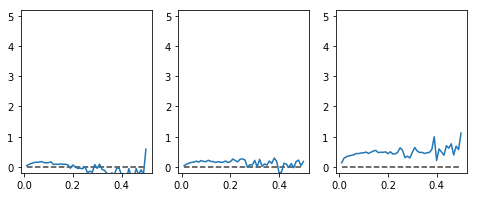

10.0


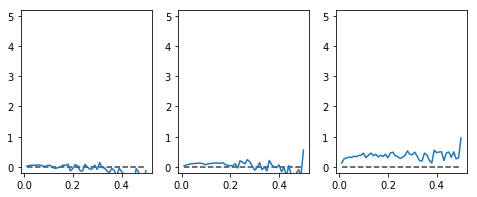

21.5443469003


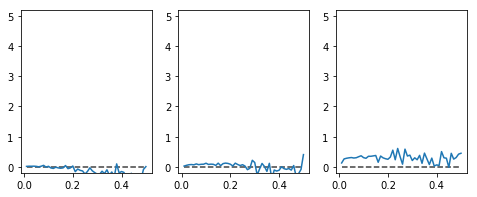

46.4158883361


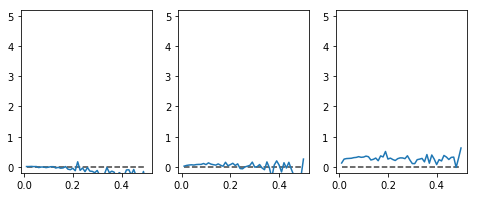

In [40]:
for i, r in enumerate(r_list):
    print(r)
    fig = plt.figure(figsize=(8,3))
    ax = plt.subplot(1,3,1)
    ax.plot(x_fold, diag_kingman[i,:])
    ax.hlines(0, x_fold[0], x_fold[-1], linestyle='dashed', color='0.25')
    ax.set_ylim([-.2,5.2])
    
    ax = plt.subplot(1,3,2)
    ax.plot(x_fold, diag_mmc[i,:])
    ax.hlines(0, x_fold[0], x_fold[-1], linestyle='dashed', color='0.25')
    ax.set_ylim([-.2,5.2])
    
    ax = plt.subplot(1,3,3)
    ax.plot(x_fold, diag_bsc[i,:])
    ax.hlines(0, x_fold[0], x_fold[-1], linestyle='dashed', color='0.25')
    ax.set_ylim([-.2,5.2])

    #ax.set_ylim([-1.0,1.0])

    plt.show()

0.1
-6.34028747081


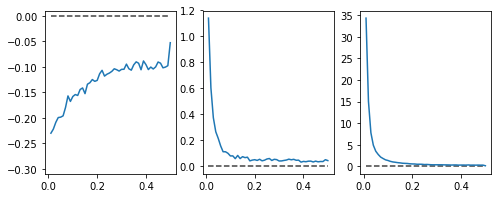

0.215443469003
-4.29627402502


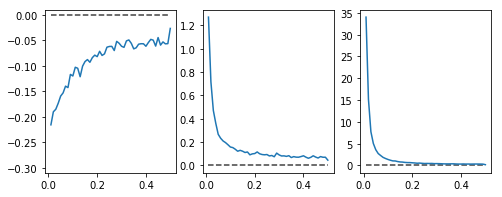

0.464158883361
-2.34390900528


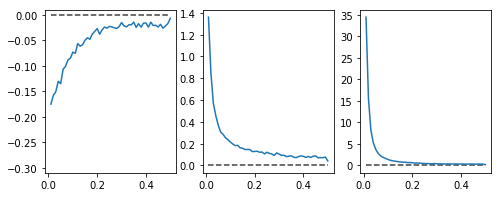

1.0
-1.3787958881


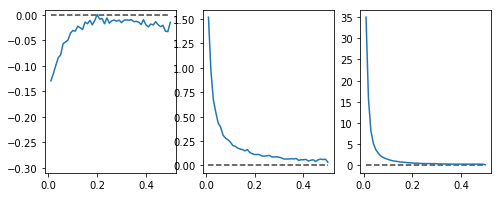

2.15443469003
-1.50107256361


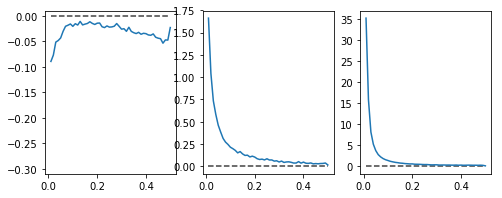

4.64158883361
-1.9110298334


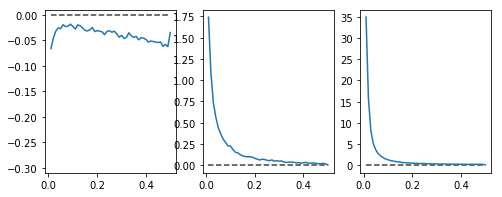

10.0
-2.22865383577


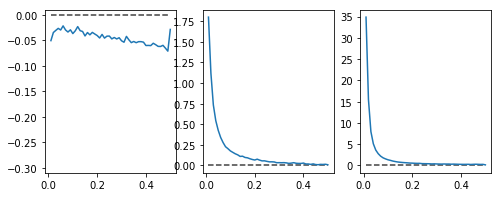

21.5443469003
-2.42202395082


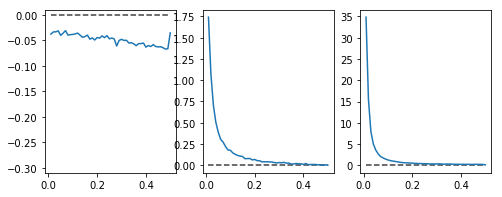

46.4158883361
-2.48651974347


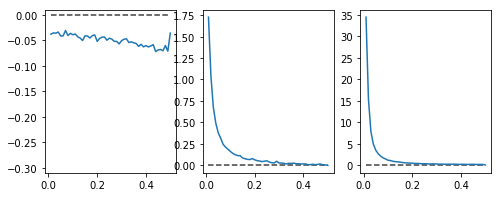

100.0
-2.51732041074


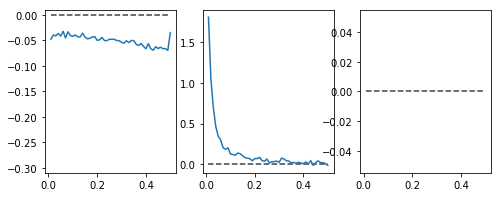

215.443469003
-2.52695954818


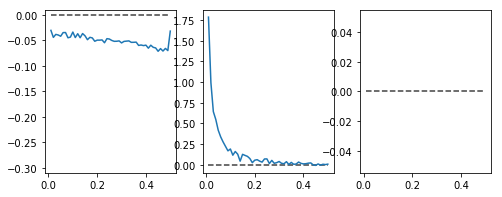

464.158883361
-2.54476154553


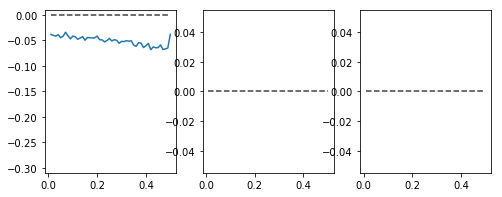

1000.0
-2.53159516863


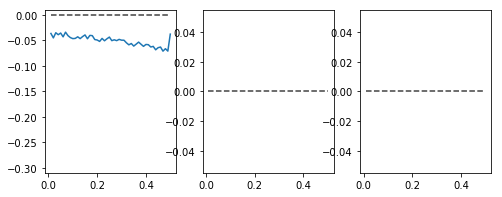

In [236]:
for i, r in enumerate(r_list):
    print(r)
    fig = plt.figure(figsize=(8,3))
    ax = plt.subplot(1,3,1)
    ax.plot(x_fold, offdiag_kingman[i,:])
    ax.hlines(0, x_fold[0], x_fold[-1], linestyle='dashed', color='0.25')
    print(np.sum(offdiag_kingman[i,:]))
    ax.set_ylim([-0.31, 0.01])
    #ax.set_ylim([-0.5,0.5])
    
    ax = plt.subplot(1,3,2)
    ax.plot(x_fold, offdiag_mmc[i,:])
    ax.hlines(0, x_fold[0], x_fold[-1], linestyle='dashed', color='0.25')
    #ax.set_ylim([-0.5,0.5])
    
    ax = plt.subplot(1,3,3)
    ax.plot(x_fold, offdiag_bsc[i,:])
    ax.hlines(0, x_fold[0], x_fold[-1], linestyle='dashed', color='0.25')
    #ax.set_ylim([-0.1, 1.1])

    plt.show()

0.1


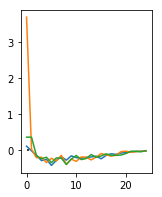

0.215443469003


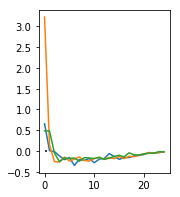

0.464158883361


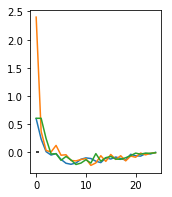

1.0


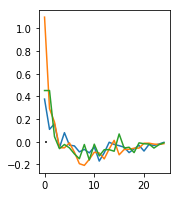

2.15443469003


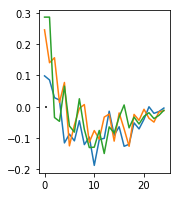

4.64158883361


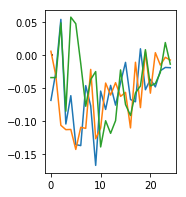

10.0


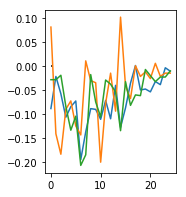

21.5443469003


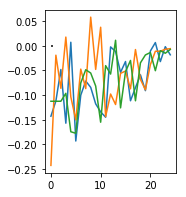

46.4158883361


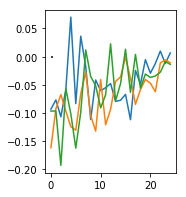

In [64]:
for i, r in enumerate(r_list):
    print(r)
    fig = plt.figure(figsize=(8,3))
    ax = plt.subplot(1,3,1)
    ax.plot(np.diagonal(PMI_kingman[i,:,::-1], offset=0)[n_samples//4:])
    ax.hlines(0, x_fold[0], x_fold[-1], linestyle='dashed', color='0.25')

    #ax = plt.subplot(1,3,2)
    ax.plot(np.diagonal(PMI_kingman[i,:,::-1], offset=1)[n_samples//4-1:])
    ax.hlines(0, x_fold[0], x_fold[-1], linestyle='dashed', color='0.25')

    #ax = plt.subplot(1,3,3)
    ax.plot(np.diagonal(PMI_kingman[i,:,::-1], offset=2)[n_samples//4-2:])
    ax.hlines(0, x_fold[0], x_fold[-1], linestyle='dashed', color='0.25')
    #ax.set_ylim([-0.31, 0.01])
    
    #ax = plt.subplot(1,3,2)
    #ax.plot(x_fold, offdiag_mmc[i,:])
    #ax.hlines(0, x_fold[0], x_fold[-1], linestyle='dashed', color='0.25')
    #ax.set_ylim([-0.5,0.5])
    
    #ax = plt.subplot(1,3,3)
    #ax.plot(x_fold, offdiag_bsc[i,:])
    #ax.hlines(0, x_fold[0], x_fold[-1], linestyle='dashed', color='0.25')
    #ax.set_ylim([-0.1, 1.1])

    plt.show()

In [ ]:
ratio_flipped = ratio_fold[:,:,::-1]
for j, r in enumerate(r_list):
    print(r)
    
    for i in range(2,25,2):
        c = str(.5 - (n_samples/2 - i)/n_samples)
        plt.plot(x_fold[:-i] - 1/2 + i/(2*n_samples),
                 np.diagonal(ratio_flipped[j,:,:], offset=-i),
                 '-', color=c)
    
    for i in range(1,25,2):
        c = str(.5 - (n_samples/2 - i)/n_samples)
        y = np.copy(np.diagonal(ratio_flipped[j,:,:], offset=-i))
        y[len(y)//2] = np.nan
        plt.plot(x_fold[:-i] - 1/2 + i/(2*n_samples),
                 y,
                 '-', color=c)
    plt.ylim([0,2])
    plt.show()

In [ ]:
for i,r in enumerate(r_list):
    print(r)
    plt.pcolor(PMI[i,:,:]>0)
    plt.show()

## Exponential growth

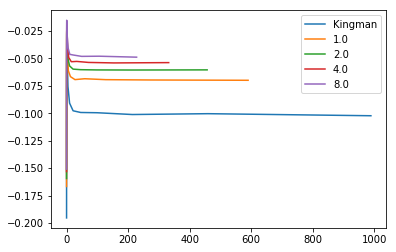

In [206]:
plt.plot(r_list*pi_kingman/2, np.mean(offdiag_kingman, axis=1), label='Kingman')

for g in [1.0, 2.0, 4.0, 8.0]:
    sim = 'g-{}'.format(g)
    mMAF = np.zeros((n_r, n_samples-1))
    jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
    for i, r in enumerate(r_list):
        fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
        with open(data_dir + fn) as datafile:
            for line in datafile:
                if line.startswith('#'):
                    continue
                else:
                    mMAF[i,:] = np.array(line.split(), dtype=float)
                    jMAF_triu[i,:] = np.array(datafile.readline().split())
                    break

    jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
    for i in range(n_r):
        jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
        jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
    jMAF += np.transpose(jMAF, axes=(0,2,1))

    mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
    mMAF_fold[:,-1] /= 2

    jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1])[:, :n_samples//2, :n_samples//2]
    jMAF_fold[:,-1,:-1] /= 2
    jMAF_fold[:,:-1,-1] /= 2
    jMAF_fold[:,-1,-1] /= 3

    mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
    ratio_fold = jMAF_fold / mMAF_sq_fold

    pi_exp = np.dot(mMAF_fold, pi_weight)
    PMI_exp = np.log2(ratio_fold)
    diag_exp = np.diagonal(PMI_exp, axis1=1, axis2=2)
    offdiag_exp = (np.sum(PMI_exp, axis=2) - diag_exp) / (n_samples/2 - 1)
    
    plt.plot(r_list*pi_exp/2, np.mean(offdiag_exp, axis=1), label=g)
plt.legend()
plt.show()

# Coarse-graining

In [ ]:
test = np.arange(32).reshape(2,-1)
print(test)
res = 3
pad = res - (test.shape[1] % res)
padded = np.pad(test, ((0,0),(0,pad)), 'constant')
print(padded)
print(padded.shape)
block_sum = padded.reshape(-1, padded.shape[1]//res, res).sum(axis=2)
print(block_sum)

## Simulations

In [ ]:
res = 10
pad = (res - (mMAF_fold.shape[1] % res)) % res

m_padded = np.pad(mMAF_fold, ((0,0),(0,pad)), 'constant')
mMAF_coarse = m_padded.reshape(-1, m_padded.shape[1]//res, res).sum(axis=2)

j_padded = np.pad(jMAF_fold, ((0,0), (0,pad), (0,pad)), 'constant')
jMAF_coarse = j_padded.reshape(-1, j_padded.shape[1]//res, res, j_padded.shape[1]//res, res).sum(axis=(2,4))

ratio_coarse = jMAF_coarse / (mMAF_coarse[:,None,:]*mMAF_coarse[:,:,None])

In [ ]:
fig1 = plt.figure(figsize=(12,4))
fig2 = plt.figure(figsize=(12,4))
fig3 = plt.figure(figsize=(12,6))

res_list = [1,2,4,8]
for i_res, res in enumerate(res_list):
    pad = (res - (mMAF_fold.shape[1] % res)) % res

    m_padded = np.pad(mMAF_fold, ((0,0),(0,pad)), 'constant')
    mMAF_coarse = m_padded.reshape(-1, m_padded.shape[1]//res, res).sum(axis=2)

    j_padded = np.pad(jMAF_fold, ((0,0), (0,pad), (0,pad)), 'constant')
    jMAF_coarse = j_padded.reshape(-1, j_padded.shape[1]//res, res, j_padded.shape[1]//res, res).sum(axis=(2,4))

    ratio_coarse = jMAF_coarse / (mMAF_coarse[:,None,:]*mMAF_coarse[:,:,None])
    print(np.sum(mMAF_coarse[:,None,:]*mMAF_coarse[:,:,None]*np.log2(ratio_coarse), axis=(1,2)))

    for i_r, r in enumerate(r_list):
        #print(r)
        ax = fig1.add_subplot(len(res_list), n_r, i_res*n_r + i_r + 1)
        ax.pcolormesh(np.log2(ratio_coarse[i_r,:,:]), vmin=-.5, vmax=.5, cmap='PuOr')
        
        ax = fig2.add_subplot(len(res_list), n_r, i_res*n_r + i_r + 1)
        for o in range(1,20,4):
            ax.plot(np.log2(np.diagonal(ratio_coarse[i_r,:,:], offset=o//res)))
        ax.set_ylim([-.5,.5])
    
    ax = fig3.add_subplot(len(res_list), 2, 2*i_res+1)
    diag = np.sum(np.diagonal(np.log2(ratio_coarse), axis1=1, axis2=2), axis=1)
    ax.semilogx(r_list, diag)
    ax.hlines(0,r_list[0],r_list[-1], linestyle='dashed', color='.25')
    ax = fig3.add_subplot(len(res_list), 2, 2*i_res+2)
    ax.semilogx(r_list, np.sum(np.log2(ratio_coarse), axis=(1,2))-diag)
    ax.hlines(0,r_list[0],r_list[-1], linestyle='dashed', color='.25')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,4))
res_list = [1,2,4,8]
for i_res, res in enumerate(res_list):
    pad = (res - (mMAF_fold.shape[1] % res)) % res

    m_padded = np.pad(mMAF_fold, ((0,0),(0,pad)), 'constant')
    mMAF_coarse = m_padded.reshape(-1, m_padded.shape[1]//res, res).sum(axis=2)

    j_padded = np.pad(jMAF_fold, ((0,0), (0,pad), (0,pad)), 'constant')
    jMAF_coarse = j_padded.reshape(-1, j_padded.shape[1]//res, res, j_padded.shape[1]//res, res).sum(axis=(2,4))

    ratio_coarse = jMAF_coarse / (mMAF_coarse[:,None,:]*mMAF_coarse[:,:,None])
    MI = np.sum(jMAF_coarse*np.log2(ratio_coarse), axis=(1,2))
    print(MI/MI[0])
    for i_r, r in enumerate(r_list):
        #print(r)
        ax = fig.add_subplot(len(res_list), n_r, i_res*n_r + i_r + 1)
        ax.pcolormesh(np.log2(ratio_coarse[i_r,:,:])>0)
plt.show()

# Independent sites

In [28]:
#mMAF = np.zeros(n_samples-1)
#jMAF_triu = np.zeros(n_samples*(n_samples-1)//2)
fn = 'jsfs_a-2.0_unlinked.txt'
with open(data_dir + fn) as datafile:
    for line in datafile:
        if line.startswith('#'):
            continue
        else:
            mMAF = np.array(line.split(), dtype=float)
            jMAF_triu = np.array(datafile.readline().split())
            break
                
jMAF = np.zeros((n_samples-1, n_samples-1))
jMAF[np.triu_indices(n_samples-1)] = jMAF_triu[:]
jMAF[np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF)

mMAF_fold = (mMAF + mMAF[::-1])[:n_samples//2]
mMAF_fold[-1] /= 2

jMAF_fold = (jMAF + jMAF[::-1,:] + jMAF[:,::-1])[:n_samples//2, :n_samples//2]
jMAF_fold[-1,:-1] /= 2
jMAF_fold[:-1,-1] /= 2
jMAF_fold[-1,-1] /= 3

mMAF_sq_fold = mMAF_fold[:,None] * mMAF_fold[None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_unlinked = jMAF_fold
mMAF_unlinked = mMAF_fold
pi_unlinked = np.dot(mMAF_fold, pi_weight)
# Note: currently waiting by joint maf
#PMI_unlinked = jMAF_fold * np.log2(ratio_fold)
PMI_unlinked = np.log2(ratio_fold)
diag_unlinked = np.diagonal(PMI_unlinked)
offdiag_unlinked = (np.sum(PMI_unlinked, axis=1) - diag_unlinked)# / (n_samples/2 - 1)

In [69]:
#mMAF = np.zeros(n_samples-1)
#jMAF_triu = np.zeros(n_samples*(n_samples-1)//2)
fn = 'jsfs_a-1.01_unlinked.txt'
with open(data_dir + fn) as datafile:
    for line in datafile:
        if line.startswith('#'):
            continue
        else:
            mMAF = np.array(line.split(), dtype=float)
            jMAF_triu = np.array(datafile.readline().split())
            break
                
jMAF = np.zeros((n_samples-1, n_samples-1))
jMAF[np.triu_indices(n_samples-1)] = jMAF_triu[:]
jMAF[np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF)

mMAF_fold = (mMAF + mMAF[::-1])[:n_samples//2]
mMAF_fold[-1] /= 2

jMAF_fold = (jMAF + jMAF[::-1,:] + jMAF[:,::-1])[:n_samples//2, :n_samples//2]
jMAF_fold[-1,:-1] /= 2
jMAF_fold[:-1,-1] /= 2
jMAF_fold[-1,-1] /= 3

mMAF_sq_fold = mMAF_fold[:,None] * mMAF_fold[None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_bsc_unlinked = jMAF_fold
mMAF_bsc_unlinked = mMAF_fold
pi_bsc_unlinked = np.dot(mMAF_fold, pi_weight)
# Note: currently waiting by joint maf
#PMI_bsc_unlinked = jMAF_fold * np.log2(ratio_fold)
PMI_bsc_unlinked = np.log2(ratio_fold)
diag_bsc_unlinked = np.diagonal(PMI_bsc_unlinked)
offdiag_bsc_unlinked = (np.sum(PMI_bsc_unlinked, axis=1) - diag_bsc_unlinked)# / (n_samples/2 - 1)

In [30]:
print(pi_unlinked)
print(pi_bsc_unlinked)

1.98075910949
1.97844534552


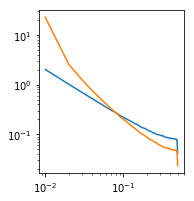

In [31]:
plt.loglog(x_fold, mMAF_unlinked)
plt.loglog(x_fold, mMAF_bsc_unlinked)
plt.show()

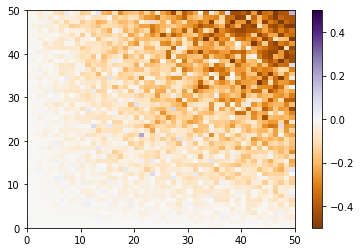

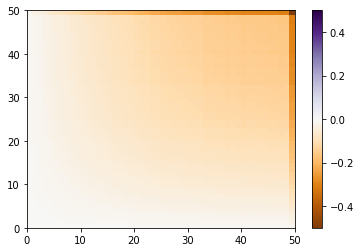

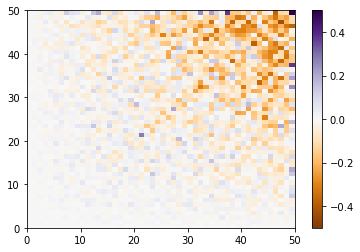

-0.0011658474833


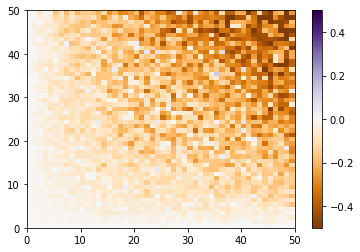

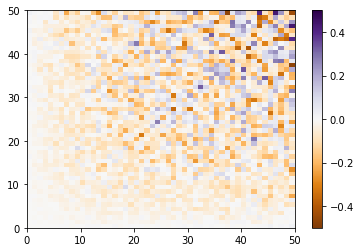

In [110]:
plt.pcolormesh(PMI_unlinked, vmin=-.5, vmax=.5, cmap='PuOr')
plt.colorbar()
plt.show()
plt.pcolormesh(-.001/(mMAF_unlinked[None,:]*mMAF_unlinked[:,None]), vmin=-.5, vmax=.5, cmap='PuOr')
plt.colorbar()
plt.show()
plt.pcolormesh(PMI_unlinked + .001/(mMAF_unlinked[None,:]*mMAF_unlinked[:,None]), vmin=-.5, vmax=.5, cmap='PuOr')
plt.colorbar()
plt.show()
print(np.mean(PMI_unlinked*(mMAF_unlinked[None,:]*mMAF_unlinked[:,None])))
plt.pcolormesh(PMI_bsc_unlinked, vmin=-0.5, vmax=0.5, cmap='PuOr')
plt.colorbar()
plt.show()
plt.pcolormesh(PMI_bsc_unlinked-PMI_unlinked, vmin=-0.5, vmax=0.5, cmap='PuOr')
plt.colorbar()
plt.show()

In [32]:
res = 10
pad = (res - (mMAF_unlinked.size % res)) % res

m_padded = np.pad(mMAF_unlinked, (0,pad), 'constant')
mMAF_coarse = m_padded.reshape(m_padded.size//res, res).sum(axis=1)

j_padded = np.pad(jMAF_unlinked, ((0,pad), (0,pad)), 'constant')
jMAF_coarse = j_padded.reshape(j_padded.shape[1]//res, res, j_padded.shape[1]//res, res).sum(axis=(1,3))

ratio_coarse = jMAF_coarse / (mMAF_coarse[None,:]*mMAF_coarse[:,None])
PMI_coarse = np.log2(ratio_coarse)

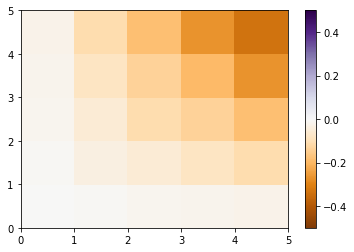

In [33]:
plt.pcolormesh(PMI_coarse, vmin=-0.5, vmax=0.5, cmap='PuOr')
plt.colorbar()
plt.show()

0.1
-0.0233433845526
0.476806197041


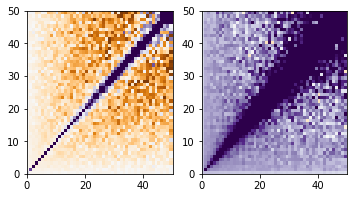

0.215443469003
0.0449899546836
0.507722003569


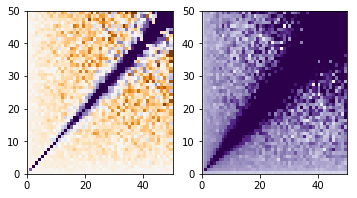

0.464158883361
0.0942447230371
0.515756314266


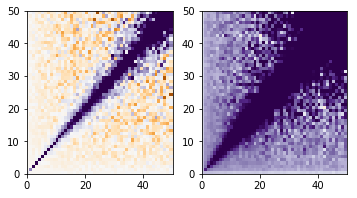

1.0
0.0975218863876
0.499527825934


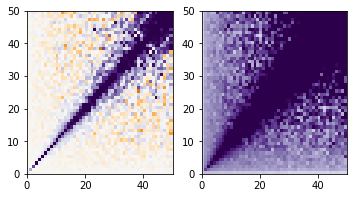

2.15443469003
0.0614094924305
0.46188262665


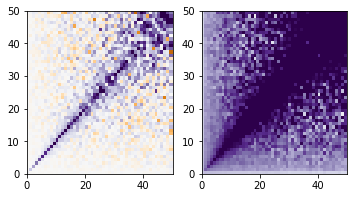

4.64158883361
0.0285839528402
0.421129540285


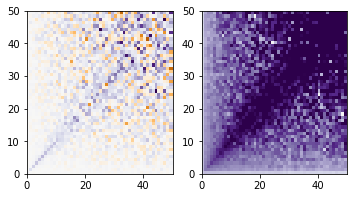

10.0
0.0125817897824
0.390391995598


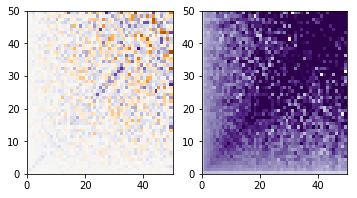

21.5443469003
0.00497231058411
0.372162113382


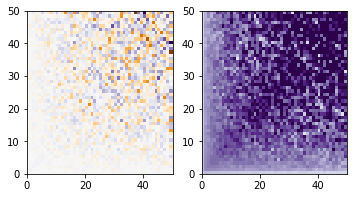

46.4158883361
0.00359285597614
0.355760278973


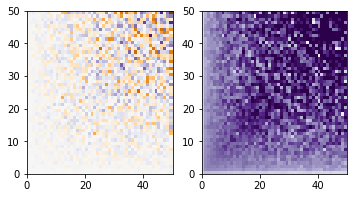

In [72]:
for i, r in enumerate(r_list):
    print(r)
    fig = plt.figure(figsize=(12,3))
    ax = plt.subplot(1,4,1)
    plt.pcolor(PMI_kingman[i,:,:] - PMI_unlinked, vmin=-0.5, vmax=0.5, cmap='PuOr')
    print(np.nanmean(PMI_kingman[i,:,:] - PMI_unlinked))
    
    ax = plt.subplot(1,4,2)
    plt.pcolor(PMI_bsc[i,:,:] - PMI_bsc_unlinked, vmin=-0.5, vmax=0.5, cmap='PuOr')
    print(np.nanmean(PMI_bsc[i,:,:] - PMI_bsc_unlinked))


    #ax = plt.subplot(1,4,2)
    #ax.pcolor(PMI_mmc[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    
    #ax = plt.subplot(1,4,3)
    #plt.pcolor(PMI_bsc[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    
    #ax = plt.subplot(1,4,4)
    #plt.pcolor(PMI_step[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')


    #plt.colorbar()

    #plt.colorbar()
    plt.show()